<a href="https://colab.research.google.com/github/NEEL5252/Global-Data-Analysis/blob/main/Analyzing_of_the_global_terrorism_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT NAME**: Global Terrorism Dataset

### **PROJECT TYPE:** EDA
### **CONTRIBUTOR:** Individual

# **PROJECT SUMMARY**

Using the Global Terrorism Database (GTD) from 1970 to 2017, this research investigates essential facets of global terrorism through extensive analysis. The findings include locations with various assault intensities, trends in annual attack frequency, success rates, and the top nations with both the highest and lowest fatalities. It dives into the number of injuries received in each nation, the number of fatalities and injuries per area, the weapons used, and the geographical predominance of assault-based assaults. This study strengthens policymaking, counterterrorism efforts, and academic research by providing greater insights into the varied processes of terrorism. Finally, it prepares stakeholders to improve global security measures, creating a proactive approach to effectively battling terrorism.


# GITHUB link:


https://github.com/NEEL5252

# Problem Statement:

1. Attacks overall by areas
2. Total assaults for the year, whether they went down or up.
3. The number of successful and unsuccessful assaults.
4. Number of people lost their lives during the terrorist attack in every country
5. The total number of victims injured in terrorist acts worldwide
6. The overall death toll by geographic region
7. The overall number of victims per location of injuries
8. The total number of weapons used
9. The location of all the assaults that took place.


# Buisseness Objective

# **LET'S START THE ANALYSIS**

## **PHASE - 1**


```
#  Importing libraries, importing dataset and read the dataset
```



In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

In [3]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the csv file / Read the csv file
globalTd = pd.read_csv("/content/drive/MyDrive/Global Terrarisom dataSet/Global Terrorism Data.csv", encoding='ISO-8859-1')

<ipython-input-4-6f2e09c616af>:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  globalTd = pd.read_csv("/content/drive/MyDrive/Global Terrarisom dataSet/Global Terrorism Data.csv", encoding='ISO-8859-1')


In [5]:
# Print the globalTd data
globalTd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
# Shape of the globalTd dataset
globalTd.shape

(181691, 135)

In [7]:
# Count the null and missing values from the particular column of the dataset
nullcounts = globalTd.isnull().sum()
# Total null and missing counts from the dataset
totalNull = nullcounts.sum()
print(totalNull)

13853997


### Insights of the dataset:-


Together, there are 181691 rows and columns. 1,38,53,997 pieces of information are either missing or null in total. The year, kind, quantity of fatalities, nature of the weapon used, quantity of injuries, and city of the assault are among the details included in this data collection. Null values and missing values for several columns need to be removed. The wrangling and cleansing of the data will soon be finished.



## **PHASE - 2:-**


```
# Understanding the dataset
```



In [8]:
# Describing our dataset
globalTd.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Calculating total number of kills and injured people during terrorist attacks
globalTd[['nkill', 'nwound']].describe()

,nkill,nwound
count,171378.000000,165380.000000
mean,2.403272,3.167668
std,11.545741,35.949392
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,2.000000
max,1570.000000,8191.000000


In [10]:
# Counting total success attacks
globalTd[globalTd['success'] == 1]['success'].sum()

161632

In [11]:
# Different types of weapons used in terrorist attacks
globalTd['weaptype1_txt'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [12]:
# Types of the attacks
globalTd['attacktype1_txt'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

### Description

From the above description:
1. Total 181691 terrorist attacks have been occured till 2017
2. In latitude and longitude we have around 4000 null values which shows that the we don't know the attacked area
3. Total 171378 people were lost their lives during terrorist attacks
4. Total 165380 people were injured during terrorist attacks
5. There are many columns which we don't need we will remove them in near future during the data wrangling phase
6. Out of 181691, 161632 attacks have been successfully executed and remains were unsuccessfull attacks
7. There are different types of weapons were used in terrorist attacks i.e. Explosives, firearms, chemical etc...
8. There are many different types of attacks were done in the past like Assassination, bombing, hijacking, kidnapping etc...

## **PHASE - 3**


```
Data Wrangling
```


1. Remove columns which will not used in our analyis, which contains more numbers of null and missing values

In [13]:
# Make list of columns which we want to delete
deleteColumns = []
for i in globalTd.columns:
  deleteColumns.append(i)

In [14]:
# columns list which are not gonna deleted (Based on these columns we will analysis the dataset)
notDeleteColumns = ['evenid', 'iyear', 'country', 'country_txt', 'region', 'region_txt',
                    'provstate', 'city', 'latitude', 'longitude', 'location',
                    'doubtterr', 'alternative', 'multiple','success',
                    'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1',
                    'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1',
                    'weaptype1', 'weaptype1_txt', 'nkill', 'nwound']

# Converting it into array
notDeleteColumnsArray = np.array(notDeleteColumns)

In [15]:
# Deleting not necessary columns from the dataset
for i in deleteColumns:
  if (notDeleteColumnsArray[notDeleteColumnsArray == i]):
    pass
  else:
    globalTd.drop(i, inplace=True, axis=1)

<ipython-input-15-1aaa51b08a68>:3: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (notDeleteColumnsArray[notDeleteColumnsArray == i]):
<ipython-input-15-1aaa51b08a68>:3: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (notDeleteColumnsArray[notDeleteColumnsArray == i]):
<ipython-input-15-1aaa51b08a68>:3: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (notDeleteColumnsArray[notDeleteColumnsArray == i]):
<ipython-input-15-1aaa51b08a68>:3: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an err

In [16]:
globalTd.head()

,iyear,country,country_txt,region,region_txt,provstate,city,latitude,longitude,location,...,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,weaptype1,weaptype1_txt,nkill,nwound
0,1970,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,...,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,13,Unknown,1.0,0.0
1,1970,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,NaN,...,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,13,Unknown,0.0,0.0
2,1970,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,...,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,13,Unknown,1.0,0.0
3,1970,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,NaN,...,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,6,Explosives,NaN,NaN
4,1970,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,...,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,8,Incendiary,NaN,NaN


All the columns that won't be needed in subsequent analysis have been eliminated.
Some columns had a significant amount of null entries, while others had the same data as other columns that had been erased.


## **PHASE - 4**


```
# DATA VISUALIZATION PART
```



### **PROBLEM: 1** Attacks overall by areas

In [17]:
# Code to calculate number of attacks by countries
totalAttacks = globalTd['country_txt'].value_counts().reset_index()

In [18]:
# Update the column names, which is easy to read the table
totalAttacks.rename(columns={'index':'country', 'country_txt':'total Attacks'}, inplace=True)

In [19]:
totalAttacks.head()

,country,total Attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306


In [20]:
# Count the total number of attacks around the world
numberOfAttacks = totalAttacks['total Attacks'].sum()
print(numberOfAttacks)

181691


In [21]:
# Calculate the percentage (How many percent of the total number of attacks have occurred in any country?)
totalAttacks['prc'] = totalAttacks['total Attacks'].apply(lambda x: round((x/numberOfAttacks) *100, 2))

In [22]:
# Sorting the Data
totalAttacks.sort_values(by='country', inplace=True)

In [23]:
totalAttacks.head()

,country,total Attacks,prc
2,Afghanistan,12731,7.01
97,Albania,80,0.04
17,Algeria,2743,1.51
203,Andorra,1,0.00
47,Angola,499,0.27


In [24]:
import plotly.express as px
import pandas as pd

# Create a line plot using Plotly Express
line_fig = px.line(totalAttacks, x='country', y='prc', title='Line Plot of Percentage')
line_fig.update_traces(line=dict(color='blue'))

# Create a bar plot using Plotly Express
bar_fig = px.bar(totalAttacks, x='country', y='total Attacks', title='Bar Plot of Total Attacks')
bar_fig.update_traces(marker_color='green')

# Combine the plots using subplot
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=('Percentage', 'Total Attacks'))

# Add the line and bar plots to the subplot
fig.add_trace(line_fig.data[0], row=1, col=1)
fig.add_trace(bar_fig.data[0], row=1, col=2)

# Set layout for subplot
fig.update_layout(width=1500, showlegend=False)

# Show the plot
fig.show()


**CONCLUSION**
```
-> Around 24,000 terrorist assaults were committed in Iraq.
-> Up to 2017, there were around 12000 assaults in India.
-> There are several nations, In which terrorist attacks have occurred the fewest times, namely in Iceland, there have been a total of 4.
```



### **PROBLEM: 2** Total assaults for the year, whether they went down or up.

In [25]:
# Fetch the data and count the total attacks per year
attacksPY = globalTd['iyear'].value_counts().reset_index()

In [26]:
# Rename the columns
attacksPY.rename(columns={'index':'year', 'iyear':'totalAttacks'}, inplace=True)

In [27]:
# Sort the table by the year
attacksPY.sort_values(by=['year'], inplace=True)

In [28]:
attacksPY.head()

,year,totalAttacks
42,1970,651
46,1971,471
44,1972,568
45,1973,473
43,1974,581


In [29]:
attacksPY['prc'] = round((attacksPY['totalAttacks'] / numberOfAttacks) * 100, 2)

In [30]:
attacksPY.head()

,year,totalAttacks,prc
42,1970,651,0.36
46,1971,471,0.26
44,1972,568,0.31
45,1973,473,0.26
43,1974,581,0.32


In [31]:
# ploting line plot to see the attacks over the years
fig = px.line(attacksPY, x = 'year', y='prc', hover_data={'year':True,
                                                                   'totalAttacks': True,
                                                                   'prc': True},
               labels={'year': 'Year', 'totalAttacks': 'Attacks', 'prc': 'Percentage'}, markers=True, line_shape='spline', color_discrete_sequence=["DarkRed"])

# Update layout (give xaxis title, yaxis title,etc...)
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Attacks',
    title='Analysis Attacks numbers per year whether decreased or increased',
    width=900
)

# Plot/ show the plot
fig.show()

**CONCLUSION**
```
 -> We may conclude from our analysis that there has been an increase in terroris activity over time.
 -> The majority of terrorist attacks—roughly 17000—took place in 2014.
 -> I made comparisons with regard to % in the graph above as well.
 -> Terrorist attacks increased from 1970 to 1992, dropped from 1992 to 1998, and then boosted again from 1999 to 2017.
```



### **PROBLEM: 3** The number of successful and unsuccessful assaults.

#### **STEP - 1** : SELECT TOTAL ATTACKS WITH GAP OF 3 YEARS

In [32]:
# We are gonna analysis attacks for every third year
selectedAttacks = attacksPY

In [33]:
selectedAttacks.reset_index(drop=True, inplace=True)

In [34]:
selectedAttacks.head()

,year,totalAttacks,prc
0,1970,651,0.36
1,1971,471,0.26
2,1972,568,0.31
3,1973,473,0.26
4,1974,581,0.32


#### **STEP - 2**: COUNT THE TOTAL SUCCESSFULL ATTACKS AND SELECT THE DATA WITH THE 3 YEARS OF GAP

In [35]:
# Now count the unsuccessful attacks
successfullAttacks = globalTd.groupby('iyear')['success'].sum().reset_index()

In [36]:
# Rename the columns
successfullAttacks.rename(columns={'iyear':'year'}, inplace=True)

In [37]:
successfullAttacks.reset_index(drop=True, inplace=True)

In [38]:
successfullAttacks.head()

,year,success
0,1970,549
1,1971,420
2,1972,452
3,1973,433
4,1974,545


#### **STEP - 3**: NOW COUNT THE UNSUCCESSFULL ATTACKS AND SELECT THE DATA WITH THE 3 YEARS OF GAP

In [39]:
# For count the unsuccessful attacks we can use below formula
# Unsuccessful = Total - successful
totalArray = np.array(selectedAttacks['totalAttacks'])
successArray = np.array(successfullAttacks['success'])

In [40]:
# Now unsuccessfull attacks
unsuccessArray = totalArray - successArray

In [41]:
# Make table of unsuccessArray
data = {
    'year': selectedAttacks['year'],
    'unsuccess': unsuccessArray
}

In [42]:
unsuccessAttacks = pd.DataFrame(data)

In [43]:
unsuccessAttacks.head()

,year,unsuccess
0,1970,102
1,1971,51
2,1972,116
3,1973,40
4,1974,36


#### **STEP - 4**: NOW CONCATE TOTAL, SUCCESS & UNSUCCESSFULL TABLE

In [44]:
# First merge selectedAttacks and successfullAttacks
result = pd.merge(selectedAttacks, successfullAttacks, how='left', on='year')

In [45]:
# Now join unsuccessfull attacks
result = pd.merge(result, unsuccessAttacks, on='year')

In [46]:
result.head()

,year,totalAttacks,prc,success,unsuccess
0,1970,651,0.36,549,102
1,1971,471,0.26,420,51
2,1972,568,0.31,452,116
3,1973,473,0.26,433,40
4,1974,581,0.32,545,36


#### **STEP-5**: NOW PLOT THE BAR CHART FOR BETTER COMPARISON

In [47]:
# Create a stacked bar chart using Plotly Express
fig = px.bar(result, x='year', y=['unsuccess', 'success', 'totalAttacks'],
             title='Stacked Bar Chart: Total, Successful, and Unsuccessful Attacks by Country',
             labels={'value': '(attacks, succ, unsucc)', 'success': 'success', 'Unsuccess': 'unsuccess'},
             color_discrete_map={'totalAttacks': 'Black', 'success': 'Red', 'unsuccess': 'Green'})

# Show the plot
fig.show()


**CONCLUSION**
```
It is clear that attacks have increased during the past year. About 80 to 90 percent of all attacks were
successful,leaving the rest to fail. Attacks have been effective at a high rate globally throughout time.
```




### **PROBLEM: 4** Number of people lost their lives during the terrorist attack in every country

**NOTE**: THERE ARE SOME ROWS WHICH HAVE NULL VALUES IN NKILL COLUMN, WE NEED TO REMOVE THEM

In [48]:
# Removes null values from the nkill columns and stored data in another variable
nnKills = globalTd[globalTd['nkill'].notnull()][['country_txt','nkill']]

In [49]:
# Now count the total number of kills for all countries
totalKills = nnKills.groupby('country_txt')[['nkill']].sum()

In [50]:
# Reset index and make dataframe
totalKills = totalKills.reset_index()

In [51]:
totalKills.head()

,country_txt,nkill
0,Afghanistan,39384.0
1,Albania,42.0
2,Algeria,11066.0
3,Angola,3043.0
4,Argentina,490.0


In [52]:
# Draw line plot using plotly.express
fig = px.line(totalKills, x ='country_txt', y='nkill', hover_data={'country_txt':True, 'nkill':True},
              labels={'country_txt':'Country Name', 'nkill':'Kills'}, markers=True, line_shape='spline')

# Set the layouts like x axis title, y axis title, etc...
fig.update_layout(
    xaxis_title ='Country Name',
    yaxis_title ='killed Number',
    title ='Number of people were lost their live in every country',
)

# Change the line and marker color
fig.update_traces(
    line=dict(color='Red'),
    marker=dict(color='Black'),
)

# Show the plot
fig.show()


**CONCLUSION**:


```
-> We can see in the plot that, Most number of people killed in Iraq which is near 80000.
-> Indian is in the 4th position in the number of people killed which near equal to 24000.
```



### **PROBLEM: 5** Number of people injured during the terrorist attack in every country

**NOTE**: *THERE ARE SOME ROWS WHICH HAVE NULL VALUES IN NWOUND COLUMNS, WHICH NEED TO BE REMOVED*

In [53]:
# Define variable which contains not null values and countries name
nnWound = globalTd[(globalTd['nwound'].notnull()) & (globalTd['nwound'] != 0)]

In [54]:
# Define a variable in which we count total injured people per country
nWound = nnWound.groupby('country_txt')['nwound'].sum().reset_index()

In [55]:
# Print the table
nWound.sort_values(by=['nwound'], ascending=False).head()

,country_txt,nwound
78,Iraq,134690.0
0,Afghanistan,44277.0
125,Pakistan,42038.0
74,India,28980.0
176,United States,20702.0


In [56]:
# Describing the data
nWound['nwound'].describe()

count       190.000000
mean       2757.205263
std       11172.328611
min           1.000000
25%          24.500000
50%         125.000000
75%        1226.750000
max      134690.000000
Name: nwound, dtype: float64

In [57]:
# Plot the line plot
fig = px.line(nWound, x ='country_txt', y='nwound', hover_data={'country_txt':True, 'nwound':True},
              labels={'country_txt':'country_txt', 'wound':'nwound'}, markers=True, line_shape='spline')

fig2 = px.line(totalKills, x ='country_txt', y='nkill', hover_data={'country_txt':True, 'nkill':True},
              labels={'country_txt':'Country Name', 'nkill':'Kills'}, markers=True, line_shape='spline')

# Set the x axis title, y axis title, etc..
fig.update_layout(
    xaxis_title ='Country Name',
    yaxis_title ='Injured Number',
    title ='Countries in which 10000+ people were injured'
)

# Change the color of line
fig.update_traces(
    line=dict(color='black'),
)

# Showing the plot
fig.show()


**CONCLUSION**


```
-> Nearly 134000 individuals have been injured in Iraq, which is the most. Nearly 44000 individuals were hurt in Afghanistan after the Iraqi
invasion.
-> About 29000 persons in India have suffered injuries due to terrorist acts.
```



### **PROBLEM - 6** The overall death toll by geographic region

In [58]:
# Fetch the region_txt and nkill columns from the globalTd data in which we removed null and 0 values
killPerRegion = globalTd[(globalTd['nkill'].notnull()) & (globalTd['nkill'] != 0.0)][['region_txt', 'nkill']]

In [59]:
killPerRegion.head()

,region_txt,nkill
0,Central America & Caribbean,1.0
2,Southeast Asia,1.0
16,Sub-Saharan Africa,1.0
25,Central America & Caribbean,1.0
59,Western Europe,1.0


In [60]:
# Group all the regions and count the total number of kills per regions
killPerRegionGroup = killPerRegion.groupby('region_txt')['nkill'].sum().reset_index()

In [61]:
killPerRegionGroup.head()

,region_txt,nkill
0,Australasia & Oceania,150.0
1,Central America & Caribbean,28708.0
2,Central Asia,1000.0
3,East Asia,1152.0
4,Eastern Europe,7415.0


In [62]:
# Total number of kills in all over the world
TotalKills = killPerRegionGroup['nkill'].sum()
TotalKills

411868.0

In [63]:
# Collect region and kills from the killPerRegionGroup table
regions = killPerRegionGroup['region_txt']
kills = killPerRegionGroup['nkill']

# Creating the pie chart figure
fig = go.Figure(data=[go.Pie(labels=regions, values=kills)])

# Adding hover text to display the values of kills per Region and region text
hover_text = [f"Region: {r}<br>Kills: {k}" for r, k in zip(regions, kills)]
fig.update_traces(hoverinfo='text', textinfo='percent+label', hovertext=hover_text)

# Adding the title of the pie chart plot
fig.update_layout(title=f'Distribution of Kills in Different Regions. Total Kills: {TotalKills}')

# Show the plot
fig.show()


**CONCLUSION**
```
-> A total of 411868.0 people have died as a result of terrorist attacks worldwide.
-> To determine how many lives have been lost in a certain area, I made a pie chart.
-> According to the pie chart above, the Middle East and North Africa had the greatest loss of life, followed by South Asia and Australasia and
Oceania, which suffered the least loss of life in relation to other regions.
```



### **PROBLEM: 7** The overall number of victims per location of injuries

In [64]:
# Fetch the region_txt(region namee) and nwound(injuries) columns from the globalTd data table
injuredPerRegion = globalTd[(globalTd['nwound'].notnull()) & (globalTd['nwound'] != 0)][['region_txt','nwound']]

In [65]:
# Counting the total number of injuries for particular region
injuredPerRegionGroup = injuredPerRegion.groupby('region_txt')['nwound'].sum().reset_index()

In [66]:
injuredPerRegionGroup

,region_txt,nwound
0,Australasia & Oceania,260.0
1,Central America & Caribbean,8991.0
2,Central Asia,2009.0
3,East Asia,9213.0
4,Eastern Europe,12045.0
5,Middle East & North Africa,214308.0
6,North America,21531.0
7,South America,16704.0
8,South Asia,141360.0
9,Southeast Asia,26259.0


In [67]:
# Counting total number of injured people in allover the world
totalInjured = injuredPerRegionGroup['nwound'].sum()
totalInjured

523869.0

In [68]:
"""
 Colleting the data of injured people and region from the injuredPerRegionGroup
 table data
"""
region = injuredPerRegionGroup['region_txt']
injured = injuredPerRegionGroup['nwound']

# Ploting pie chart
fig = go.Figure(data=(go.Pie(labels=region, values=injured)))

# Showing the data of region and injured people while hover the pie char
hover_data = [f"Region: {r}<br>Injured: {i}" for r, i in zip(region, injured)]
fig.update_traces(hoverinfo='text', textinfo="percent+label", hovertext=hover_data)

# Adding the title to the pie chart
fig.update_layout(
    title=f"calculated the global injury rate per region and distributed it. Total injured in all over the world:{totalInjured}"
)

# Showing the pie chart
fig.show()

##### **CONCLUSION**

```
-> The same idea applies here as it did in chart number 6, as well.
-> 523869.0 individuals in total have been hurt in terrorist acts that have occurred during the past year worldwide.
-> The Middle East and North Africa have had the most injuries over the years, whereas Australasia and the Oceania area have sustained
fewer injuries in comparison to other regions.
```



### **PROBLEM: 8** The total number of weapons used

In [69]:
# Counts the total number of weapons which are used in particular regions
regionWp = globalTd.groupby('region_txt')['weaptype1_txt'].value_counts()

In [70]:
# Convert it into the data frame
regionWp = pd.DataFrame(regionWp).rename(columns={'weaptype1_txt': 'weapNo'}).reset_index()

In [71]:
regionWp.head()

,region_txt,weaptype1_txt,weapNo
0,Australasia & Oceania,Explosives,80
1,Australasia & Oceania,Firearms,74
2,Australasia & Oceania,Incendiary,74
3,Australasia & Oceania,Unknown,31
4,Australasia & Oceania,Chemical,11


##### **Heatmap Plot**

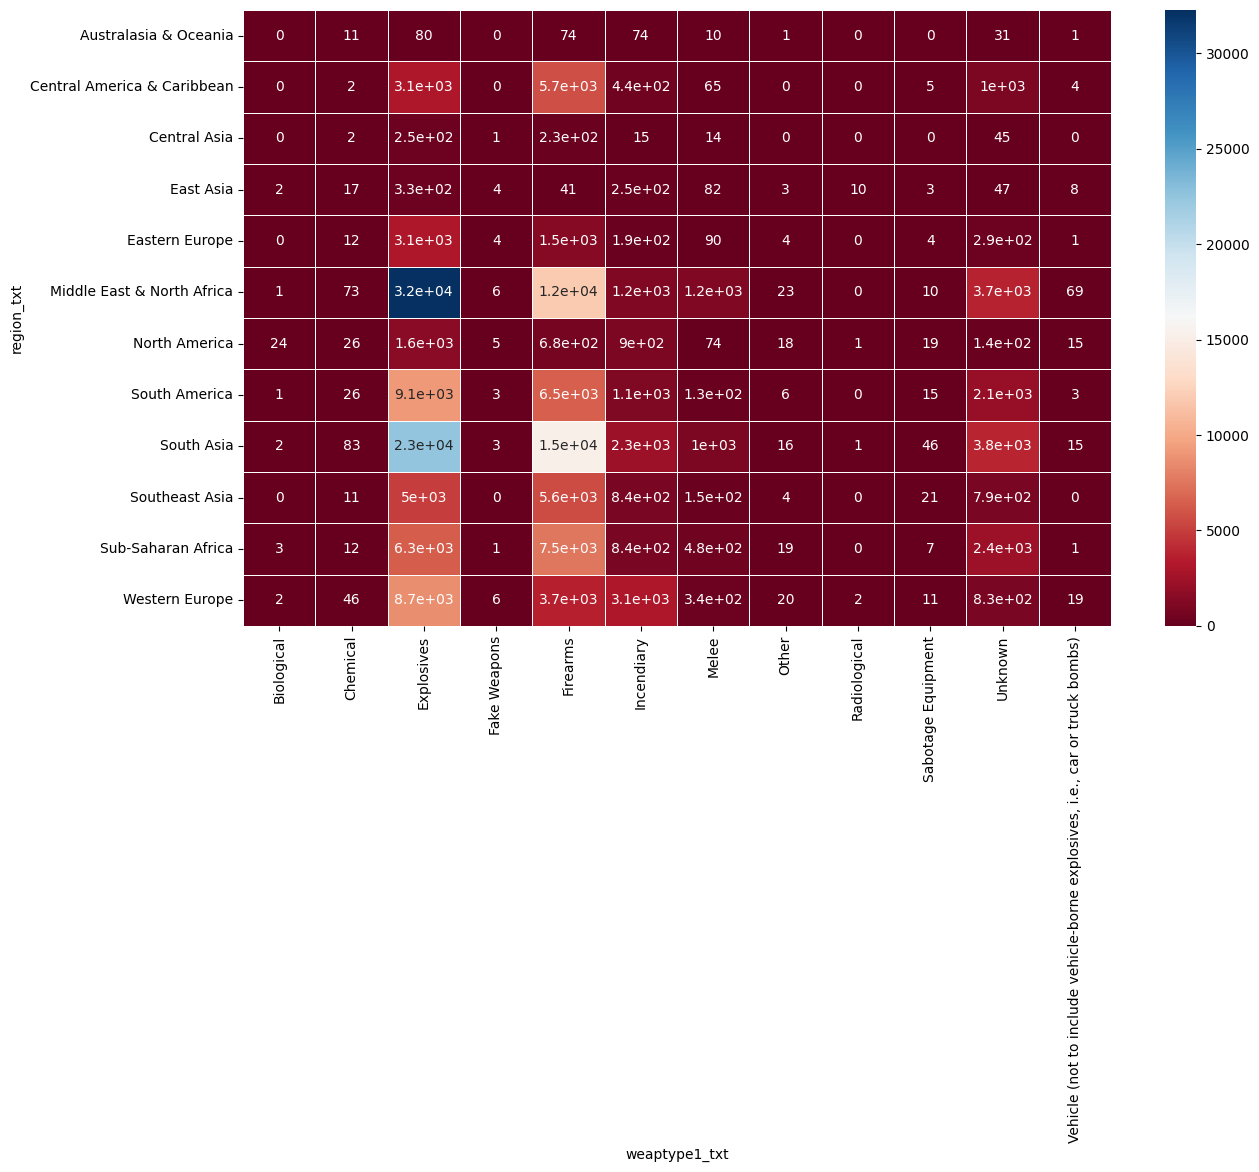

In [72]:
# Creating dataframe from the above data for creating heatmap plot
data_df = regionWp.pivot(columns='weaptype1_txt', index='region_txt', values='weapNo')
# There are some weapons which were not used in some regions, (filling that values)
data_df.fillna(0, inplace=True)

# Creating heatmap plot
plt.figure(figsize=(14, 8))
sns.heatmap(data_df, annot=True, cmap='RdBu', linewidths=0.5, linecolor='white')

# Show the plot
plt.show()

**CONCLUSION**


```
-> First, we demonstrate via a pie chart that the Middle East and North Africa area has had the greatest number of terrorist strikes, where
guns and explosives are most often utilized.
-> Thereafter, explosive weapons were also often utilized in South Asia.
-> In general, explosives, firearms, incendiary, and melee weapons were employed most frequently in terrorist attacks across the world.
-> It was still difficult to identify the weapon used in many terrorist assaults.

```



### **PROBLEM: 9** The location of all the assaults that took place.

In [73]:
# Grouping regions by attack types and their numbers
regionAttack = globalTd.groupby('region_txt')['attacktype1_txt'].value_counts()

In [74]:
# Reseting index of columns
regionAttack = pd.DataFrame(regionAttack).rename(columns={'attacktype1_txt': 'attack_number'}).reset_index()

In [75]:
regionAttack.sort_values(by='region_txt').head()

,region_txt,attacktype1_txt,attack_number
0,Australasia & Oceania,Bombing/Explosion,75
1,Australasia & Oceania,Facility/Infrastructure Attack,71
2,Australasia & Oceania,Armed Assault,51
3,Australasia & Oceania,Assassination,36
4,Australasia & Oceania,Unknown,16


##### **HEATMAP PLOT**

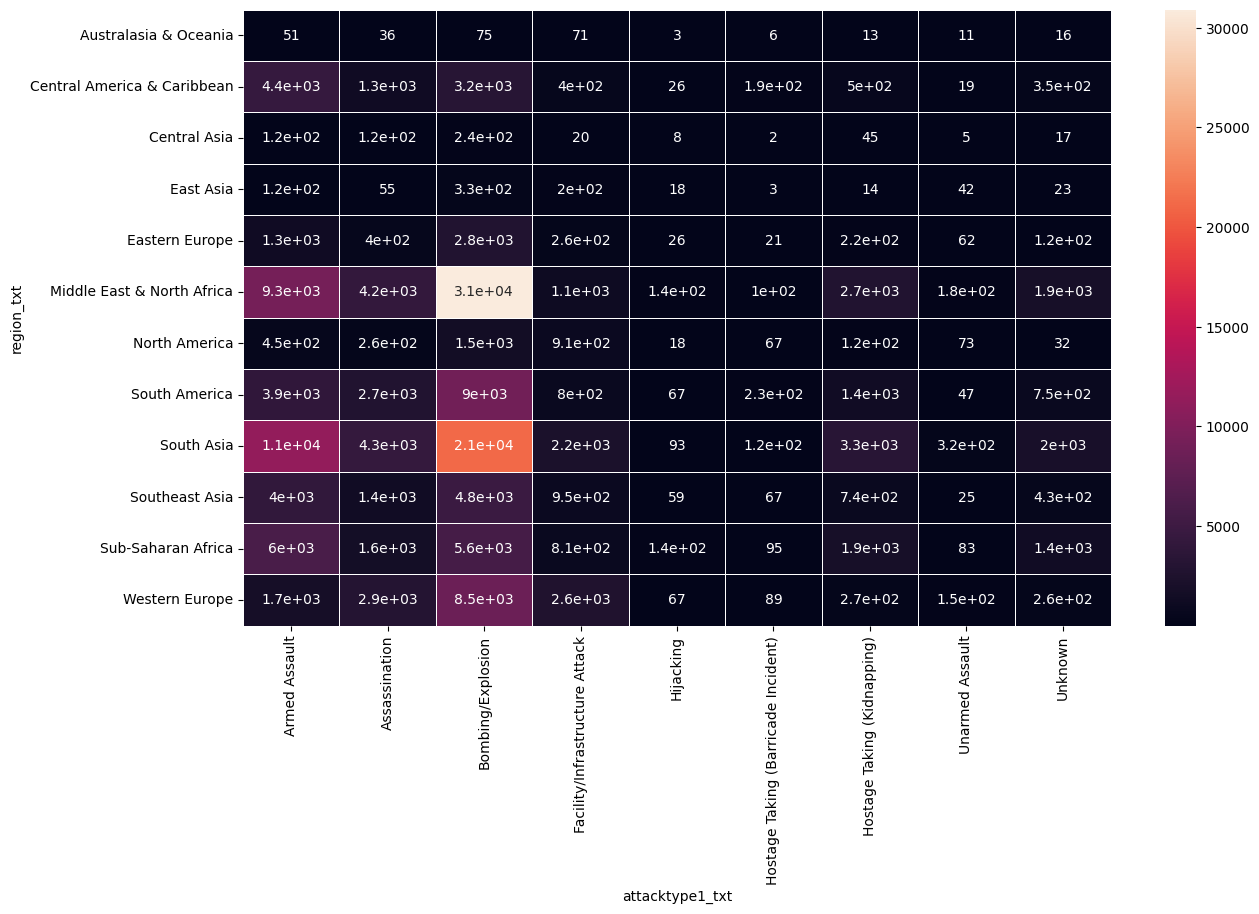

In [76]:
# Now creating a data frame of above data from the regionAttack table
plt.figure(figsize=(14,8))
df = regionAttack.pivot(columns='attacktype1_txt', index='region_txt', values='attack_number')

# Draw a heatmap plot
sns.heatmap(df, annot=True, linewidth=0.5, linecolor='white')

# Showing the plot
plt.show()

**CONCLUSION**


```
-> Terrorist attacks frequently included assassinations, armed attacks, and bombings/explosions.
-> Most bombings and explosions occur in the Middle East and North Africa.
-> Some attacks in some areas were not clearly identifiable as terrorist attacks.

```

